# Rede neural MLP para classificação de imagens de digitos com scikit-learn

### Import das bibliotecas

In [1]:
import matplotlib.pyplot as plt# Para plotar imagens
from sklearn.datasets import fetch_openml# Importar um dataset chamado MNIST
from sklearn import metrics# Acuracia, Precisao, F1-Score e Recall
from sklearn.neural_network import MLPClassifier# RNA MLP
from sklearn.model_selection import train_test_split as tts# Dividir o dataset em treino e teste

In [3]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

X_normalizado = X / 255.0# Normalizando entre 0 e 1

In [5]:
X_train_N, X_test_N, y_train, y_test = tts(X_normalizado, y, random_state=42, test_size=0.3)
X_train, X_test, y_train, y_test = tts(X, y, random_state=42, test_size=0.3)

### Criando a rede neural MLP

In [6]:
mlp_N = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=10, alpha=1e-4,
                    solver="sgd", verbose=10, random_state=42, learning_rate_init=0.2)
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=10, alpha=1e-4,
                    solver="sgd", verbose=10, random_state=42, learning_rate_init=0.2)

### Visulizando os digitos

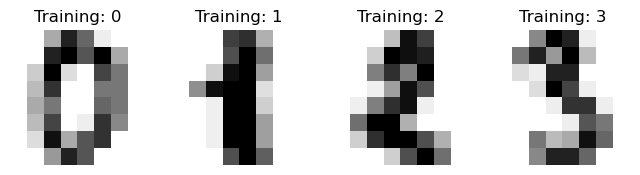

In [7]:
from sklearn import datasets
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(8, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

### Treinando a rede neural para classificar imagens

In [8]:
mlp_N.fit(X_train_N, y_train)

Iteration 1, loss = 0.77353445
Iteration 2, loss = 0.37512997
Iteration 3, loss = 0.35217598
Iteration 4, loss = 0.34329812
Iteration 5, loss = 0.34012925
Iteration 6, loss = 0.33062665
Iteration 7, loss = 0.32429439
Iteration 8, loss = 0.33367757
Iteration 9, loss = 0.31630443
Iteration 10, loss = 0.31349168


C:\Users\edvon\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.2,
              max_iter=10, random_state=42, solver='sgd', verbose=10)

In [9]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 2.52945581
Iteration 2, loss = 2.44442513
Iteration 3, loss = 2.44409451
Iteration 4, loss = 2.44383935
Iteration 5, loss = 2.44398052
Iteration 6, loss = 2.44399302
Iteration 7, loss = 2.44345449
Iteration 8, loss = 2.44401759
Iteration 9, loss = 2.44363299
Iteration 10, loss = 2.44410534


C:\Users\edvon\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.2,
              max_iter=10, random_state=42, solver='sgd', verbose=10)

In [10]:
print(f"Acuracia da RNA (dados normalizados): {100 * round(mlp_N.score(X_test_N, y_test), 4)}%")
print(f"Acuracia da RNA (dados não normalizados): {100 * round(mlp.score(X_test, y_test), 4)}%")

Acuracia da RNA (dados normalizados): 90.71000000000001%
Acuracia da RNA (dados não normalizados): 11.26%


### Calculando outras metricas (Precisao, F1-Score, Recall)

In [11]:
predict_mlp_N = mlp_N.predict(X_test_N)
predict_mlp = mlp.predict(X_test)

In [12]:
print(
    f"Classification report for classifier {mlp_N}:\n"
    f"{metrics.classification_report(y_test, predict_mlp_N)}\n"
)

Classification report for classifier MLPClassifier(hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.2,
              max_iter=10, random_state=42, solver='sgd', verbose=10):
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2058
           1       0.92      0.97      0.95      2364
           2       0.91      0.90      0.90      2133
           3       0.92      0.86      0.89      2176
           4       0.95      0.87      0.91      1936
           5       0.88      0.82      0.85      1915
           6       0.89      0.98      0.93      2088
           7       0.91      0.95      0.93      2248
           8       0.91      0.84      0.87      1992
           9       0.85      0.91      0.88      2090

    accuracy                           0.91     21000
   macro avg       0.91      0.90      0.91     21000
weighted avg       0.91      0.91      0.91     21000




In [13]:
print(
    f"Classification report for classifier {mlp}:\n"
    f"{metrics.classification_report(y_test, predict_mlp)}\n"
)

Classification report for classifier MLPClassifier(hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.2,
              max_iter=10, random_state=42, solver='sgd', verbose=10):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2058
           1       0.11      1.00      0.20      2364
           2       0.00      0.00      0.00      2133
           3       0.00      0.00      0.00      2176
           4       0.00      0.00      0.00      1936
           5       0.00      0.00      0.00      1915
           6       0.00      0.00      0.00      2088
           7       0.00      0.00      0.00      2248
           8       0.00      0.00      0.00      1992
           9       0.00      0.00      0.00      2090

    accuracy                           0.11     21000
   macro avg       0.01      0.10      0.02     21000
weighted avg       0.01      0.11      0.02     21000




C:\Users\edvon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\edvon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\edvon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predict_mlp_N)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()